In [4]:

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [6]:
#csv_reading
book_ratings = pd.read_csv("BX-Book-Ratings.csv", sep=';', error_bad_lines=False, encoding="latin-1")
book_ratings.columns = ['userID', 'ISBN', 'bookRating']
book_ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
books = pd.read_csv("BX-Books.csv", sep=';', error_bad_lines=False, encoding="latin-1", low_memory=False)
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
books.head()

/home/ondra/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3437: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\nSkipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\nSkipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\nSkipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [9]:
users = pd.read_csv("BX-Users.csv", sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']
users.head()

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


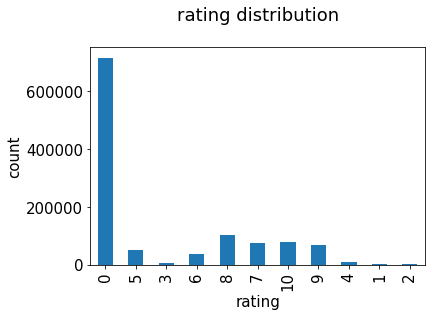

In [10]:
#visualisation with pyplot
plt.rc("font", size=15)
book_ratings.bookRating.value_counts(sort=False).plot(kind='bar')
plt.title('rating distribution\n')
plt.xlabel('rating')
plt.ylabel('count')
plt.show()

In [11]:
print(books.shape)
print(list(books.columns))

(271360, 8)
['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


In [12]:
print(users.shape)
print(list(users.columns))

(278858, 3)
['userID', 'Location', 'Age']


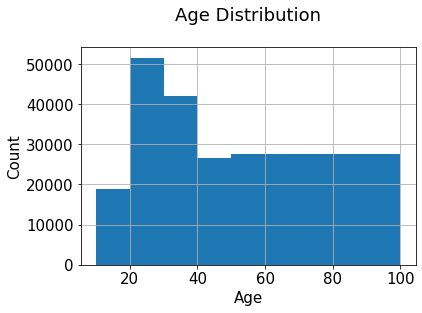

In [21]:
users.Age.hist(bins=[10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [22]:
counts1 = book_ratings['userID'].value_counts()
book_ratings = book_ratings[book_ratings['userID'].isin(counts1[counts1 >= 200].index)]
counts = book_ratings['bookRating'].value_counts()
book_ratings = book_ratings[book_ratings['bookRating'].isin(counts[counts >= 100].index)]

In [23]:
#tables merge
combine_book_rating = pd.merge(book_ratings, books, on='ISBN')
columns = ['yearOfPublication', 'publisher', 'bookAuthor', 'imageUrlS', 'imageUrlM', 'imageUrlL']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
print(combine_book_rating.head())

   userID        ISBN  bookRating  \
0  277427  002542730X          10   
1    3363  002542730X           0   
2   11676  002542730X           6   
3   12538  002542730X          10   
4   13552  002542730X           0   

                                           bookTitle  
0  Politically Correct Bedtime Stories: Modern Ta...  
1  Politically Correct Bedtime Stories: Modern Ta...  
2  Politically Correct Bedtime Stories: Modern Ta...  
3  Politically Correct Bedtime Stories: Modern Ta...  
4  Politically Correct Bedtime Stories: Modern Ta...  


In [24]:
#drop not a number values
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['bookTitle'])

#imdb rating
book_ratingCount = (combine_book_rating.
     groupby(by = ['bookTitle'])['bookRating'].
     count().
     reset_index().
     rename(columns = {'bookRating': 'totalRatingCount'})
     [['bookTitle', 'totalRatingCount']]
    )
print(book_ratingCount.head())

                                           bookTitle  totalRatingCount
0   A Light in the Storm: The Civil War Diary of ...                 2
1                              Always Have Popsicles                 1
2               Apple Magic (The Collector's series)                 1
3   Beyond IBM: Leadership Marketing and Finance ...                 1
4   Clifford Visita El Hospital (Clifford El Gran...                 1


In [25]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'left')
print(rating_with_totalRatingCount.head())

pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

   userID        ISBN  bookRating  \
0  277427  002542730X          10   
1    3363  002542730X           0   
2   11676  002542730X           6   
3   12538  002542730X          10   
4   13552  002542730X           0   

                                           bookTitle  totalRatingCount  
0  Politically Correct Bedtime Stories: Modern Ta...                82  
1  Politically Correct Bedtime Stories: Modern Ta...                82  
2  Politically Correct Bedtime Stories: Modern Ta...                82  
3  Politically Correct Bedtime Stories: Modern Ta...                82  
4  Politically Correct Bedtime Stories: Modern Ta...                82  
count   160576.000
mean         3.044
std          7.428
min          1.000
25%          1.000
50%          1.000
75%          2.000
max        365.000
Name: totalRatingCount, dtype: float64


In [26]:
C = rating_with_totalRatingCount['bookRating'].mean()
C

1.9500861395173732

In [27]:
m = rating_with_totalRatingCount['totalRatingCount'].quantile(0.9)
m

61.0

In [28]:
qualify_books = rating_with_totalRatingCount.copy().loc[rating_with_totalRatingCount['totalRatingCount'] >= m]
qualify_books.shape

(49508, 5)

In [29]:
def weighted_rating(x, m=m, C=C):
    v = x['totalRatingCount']
    R = x['bookRating']
    return (v/(v+m)*R) + (m/(m+v)*C)

In [30]:
qualify_books['score'] = qualify_books.apply(weighted_rating,axis=1)
print(qualify_books.head())

   userID        ISBN  bookRating  \
0  277427  002542730X          10   
1    3363  002542730X           0   
2   11676  002542730X           6   
3   12538  002542730X          10   
4   13552  002542730X           0   

                                           bookTitle  totalRatingCount  score  
0  Politically Correct Bedtime Stories: Modern Ta...                82  6.566  
1  Politically Correct Bedtime Stories: Modern Ta...                82  0.832  
2  Politically Correct Bedtime Stories: Modern Ta...                82  4.272  
3  Politically Correct Bedtime Stories: Modern Ta...                82  6.566  
4  Politically Correct Bedtime Stories: Modern Ta...                82  0.832  


In [31]:
qualify_books = qualify_books.sort_values('score', ascending=False)

In [27]:
print(qualify_books.head())

In [28]:
popularity_limit = 50
rating_popular_book = qualify_books.query('totalRatingCount >= @popularity_limit')
print(rating_popular_book.head())

In [29]:
combined = rating_popular_book.merge(users, left_on = 'userID', right_on = 'userID', how = 'left')
top_countries_user_rating = combined[combined['Location'].str.contains("mexico|germany|usa|russia|australia|portugal|italy|france|netherlands")]
top_countries_user_rating.drop('Age', axis=1)
print(top_countries_user_rating.head())

In [30]:
from scipy.sparse import csr_matrix
top_countries_user_rating = top_countries_user_rating.drop_duplicates(['userID', 'bookTitle'])
top_countries_user_rating_pivot = top_countries_user_rating.pivot(index = 'bookTitle', columns = 'userID', values = 'bookRating').fillna(0)
top_countries_user_rating_matrix = csr_matrix(top_countries_user_rating_pivot.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(top_countries_user_rating_matrix)
print(model_knn)

In [31]:
query_index = np.random.choice(top_countries_user_rating_pivot.shape[0])
print(query_index)
print(top_countries_user_rating_pivot.iloc[query_index,:].values.reshape(1,-1))
distances, indices = model_knn.kneighbors(top_countries_user_rating_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)
top_countries_user_rating_pivot.index[query_index]

In [32]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(top_countries_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, top_countries_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))